# 2019 Machine Learning and Data Science Survey

Every year, since 2017, the Kaggle community sets out to conduct an industry-wide survey on the __State of Data Science and Machine Learning__ . This is for the year 2019. The dataset was gathered from a pool of 19,717 usable respondents from 171 countries and territories, cleaned and prepared by the Kaggle community.

Here, we are exploring:
-	Who is working with data?
-	The best ways for new data scientists to break into the field.
-	What is happening with Machine Learning in different industries?


## WHO IS WORKING WITH DATA?
After preprocessing the datasets for the exploration, I went to explore the __age__, __gender__, __country__ and __education__ of Kagglers.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import patches as patches

In [3]:
dat = pd.read_csv('multiple_choice_responses.csv', dtype='object')

dat.drop(dat.index[0], inplace=True)

In [4]:
dat['Q4'] = dat['Q4'].apply(lambda x : x if x != 'Some college/university study without earning a bachelor’s degree' else "Bachelor's degree")
dat['Q4'] = dat['Q4'].apply(lambda x : x if x != 'Bachelor’s degree' else "Bachelor's degree")
dat['Q4'] = dat['Q4'].apply(lambda x : x if x != 'Master’s degree' else "Master's degree")
dat['Q4'] = dat['Q4'].apply(lambda x : x if x != 'No formal education past high school' else "High school")

dat['Q3'] = dat['Q3'].apply(lambda x : x if x != 'United Kingdom of Great Britain and Northern Ireland' else 'UK')
dat['Q3'] = dat['Q3'].apply(lambda x : x if x != 'United States of America' else 'US')
dat['Q3'] = dat['Q3'].apply(lambda x : x if x != 'Viet Nam' else 'Vietnam')
dat['Q3'] = dat['Q3'].apply(lambda x : x if x != 'Hong Kong (S.A.R.)' else 'Hong Kong')

dat['Age'] = dat['Q1'].astype('category').cat.as_ordered()
dat['Gender'] = dat['Q2']
dat['Country'] = dat['Q3']

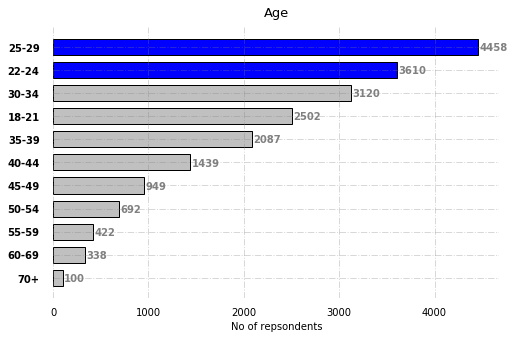

In [5]:
age = dat['Age'].value_counts().reset_index()

#fig size
fig, ax = plt.subplots(figsize=(8,5))

b = ax.barh(age.iloc[:,0], age.iloc[:,1], color='silver', edgecolor='black', height=0.7)
b[0].set_color('blue')
b[0].set_edgecolor('black')
b[0].set_linewidth(1)
b[1].set_color('blue')
b[1].set_edgecolor('black')
b[1].set_linewidth(1)

# Remove axes spines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
    
# Remove x,y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between the axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.3)

# Show top values
ax.invert_yaxis()

# Add plot title
ax.set_title("Age", loc='center', pad=10, fontsize=13)
ax.set_xlabel('No of repsondents')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+15, i.get_y()+0.5, str(round(i.get_width(),2)), 
           fontsize=10, fontweight='bold', color='grey')
    
z = [x for x in range(0,11)]
plt.yticks(z, list(age.iloc[:,0]), weight='bold')
plt.show()

In [7]:
gender = dat['Gender'].value_counts().reset_index()

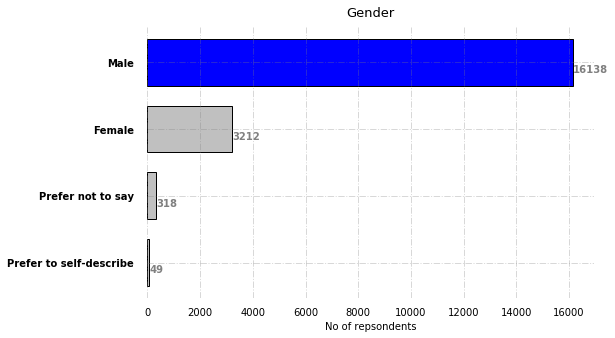

In [8]:
#fig size
fig, ax = plt.subplots(figsize=(8,5))

b = ax.barh(gender.iloc[:,0], gender.iloc[:,1], color='silver', edgecolor='black', height=0.7)
b[0].set_color('blue')
b[0].set_edgecolor('black')
b[0].set_linewidth(1)

# Remove axes spines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
    
# Remove x,y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between the axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.3)

# Show top values
ax.invert_yaxis()

# Add plot title
ax.set_title("Gender", loc='center', pad=10, fontsize=13)
ax.set_xlabel('No of repsondents')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+15, i.get_y()+0.5, str(round(i.get_width(),2)), 
           fontsize=10, fontweight='bold', color='grey')
    
z = [x for x in range(0,4)]
plt.yticks(z, list(gender.iloc[:,0]), weight='bold')
plt.show()

In [9]:
country = dat['Country'].value_counts().reset_index()[:20]

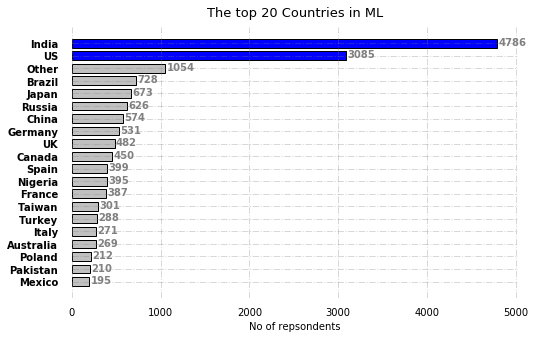

In [10]:
#fig size
fig, ax = plt.subplots(figsize=(8,5))

b = ax.barh(country.iloc[:,0], country.iloc[:,1], color='silver', edgecolor='black', height=0.7)
b[0].set_color('blue')
b[0].set_edgecolor('black')
b[0].set_linewidth(1)
b[1].set_color('blue')
b[1].set_edgecolor('black')
b[1].set_linewidth(1)

# Remove axes spines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
    
# Remove x,y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between the axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.3)

# Show top values
ax.invert_yaxis()

# Add plot title
ax.set_title("The top 20 Countries in ML", loc='center', pad=10, fontsize=13)
ax.set_xlabel('No of repsondents')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+15, i.get_y()+0.5, str(round(i.get_width(),2)), 
           fontsize=10, fontweight='bold', color='grey')
    
z = [x for x in range(0,20)]
plt.yticks(z, list(country.iloc[:,0]), weight='bold')
plt.show()

In [11]:
degree = pd.DataFrame(columns=['degree', 'count', 'percentage'])

degree['degree'] = dat['Q4'].value_counts().index
degree['count'] = dat['Q4'].value_counts().values
degree['percentage'] = dat['Q4'].value_counts().values/dat['Q4'].value_counts().sum()

degree.index = degree['degree']
degree = degree.drop(columns='degree')
degree['percentage'] = degree['percentage']*100
# degree_sort = degree[['percentage']].sort_values(by='percentage', ascending=False)
degree_sort = degree[['count']].sort_values(by='count', ascending=False)
degree_rst = degree_sort.reset_index()

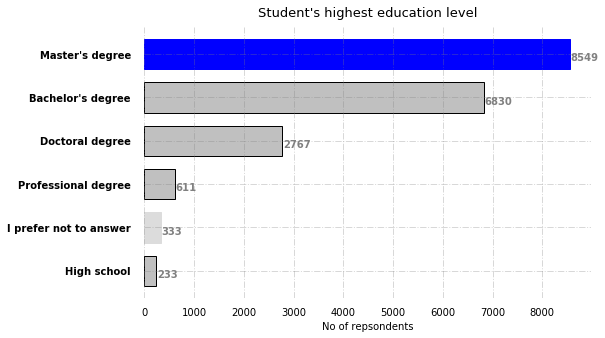

In [12]:
#fig size
fig, ax = plt.subplots(figsize=(8,5))

# Horizontal Bar Plot
b = ax.barh(degree_rst.iloc[:,0], degree_rst.iloc[:,1], color='silver', edgecolor='black', height=0.7)
b[0].set_color('blue')
# b[0].set_edgecolor('black')
b[0].set_linewidth(1)
b[4].set_color('gainsboro')
# b[4].set_edgecolor('black')


# Remove axes spines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
    
# Remove x,y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between the axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.3)

# Show top values
ax.invert_yaxis()

# Add plot title
ax.set_title("Student's highest education level", loc='center', pad=10, fontsize=13)
ax.set_xlabel('No of repsondents')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+15, i.get_y()+0.5, str(round(i.get_width(),2)), 
           fontsize=10, fontweight='bold', color='grey')
    
z = [x for x in range(0,6)]
plt.yticks(z, list(degree_rst.iloc[:,0]), weight='bold')
plt.show()

-	The greater number of Kagglers are __young__ people, with the ages of __22-29__ years.
-	There is the dominance of __Indians__ in the survey followed by the __U.S.__ and __Brazil__.
-	Majority of them are __male__.
-	A greater percentage of them are pursuing their __Master’s__ degree. These are followed by those pursuing their __Bachelor’s__ Degree.

The young, mostly Indians and Americans, currently studying for their Master’s Degree, are interested in Data Science and Machine Learning. It could be that they are studying them in their programs or that there are other platforms from which they learn Data Science and Machine Learning. 

## THE BEST WAYS FOR NEW DATA SCIENTISTS TO BREAK INTO THE FIELD

In [13]:
dat_ide = pd.DataFrame(columns=['IDE','count','percentage'])

for i in range(1,12):
    dat_ide = dat_ide.append({'IDE':dat['Q13_Part_{}'.format(i)].mode()[0],'count':dat['Q13_Part_{}'.format(i)].count(),'percentage':dat['Q13_Part_{}'.format(i)].count()/len(dat)},ignore_index=True)

dat_ide.index = dat_ide['IDE']
dat_ide = dat_ide.drop(columns='IDE')
dat_ide['percentage'] = dat_ide['percentage']*100
dat_ide_sort = dat_ide[['percentage']].sort_values(by='percentage', ascending=False)
dat_ide_rst = dat_ide_sort.reset_index()

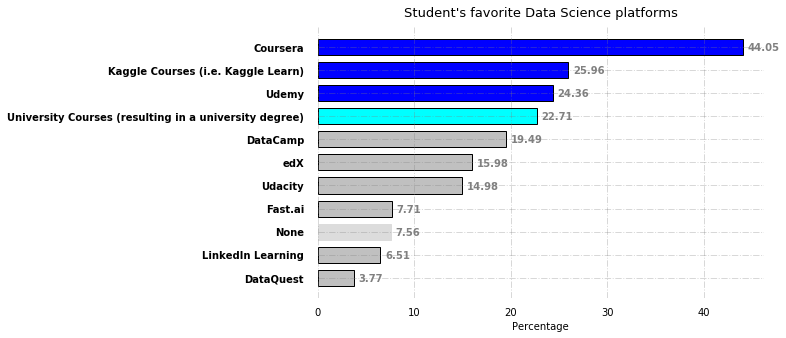

In [16]:
#fig size
fig, ax = plt.subplots(figsize=(8,5))

# Horizontal Bar Plot
b = ax.barh(dat_ide_rst.iloc[:,0], dat_ide_rst.iloc[:,1], color='silver', edgecolor='black', height=0.7)
b[0].set_color('blue')
b[0].set_edgecolor('black')
b[0].set_linewidth(1)
b[1].set_color('blue')
b[1].set_edgecolor('black')
b[1].set_linewidth(1)
b[2].set_color('blue')
b[2].set_edgecolor('black')
b[2].set_linewidth(1)
b[3].set_color('cyan')
b[3].set_edgecolor('black')
b[3].set_linewidth(1)
b[8].set_color('gainsboro')

# Remove axes spines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
    
# Remove x,y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between the axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.3)

# Show top values
ax.invert_yaxis()

# Add plot title
ax.set_title("Student's favorite Data Science platforms", loc='center', pad=10, fontsize=13)
ax.set_xlabel('Percentage')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+0.5, i.get_y()+0.5, str(round(i.get_width(),2)), 
           fontsize=10, fontweight='bold', color='grey')
z = [x for x in range(0,11)]
plt.yticks(z, list(dat_ide_rst.iloc[:,0]), weight='bold')
plt.show()

-	The top three student’s platform are online – __Coursera__, __Kaggle Courses__ and __Udemy__
-	The next is __University courses__.

It is clear that the students supplement their undergraduate and masters programs with learning Data Science and Machine Learning online. This is because Universities are gradually adding Data Science curriculum to their programs in order to meet up with the industry demand. The only way for these students to catch up quickly is through online learning.

In [18]:
media = pd.DataFrame(columns=['media','count','percentage'])

for i in range(1,12):
    media = media.append({'media':dat['Q12_Part_{}'.format(i)].mode()[0],'count':dat['Q12_Part_{}'.format(i)].count(),'percentage':dat['Q13_Part_{}'.format(i)].count()/len(dat)},ignore_index=True)

media.index = media['media']
media = media.drop(columns='media')
media['percentage'] = media['percentage']*100
media_sort = media[['percentage']].sort_values(by='percentage', ascending=False)
media_rst = media_sort.reset_index()

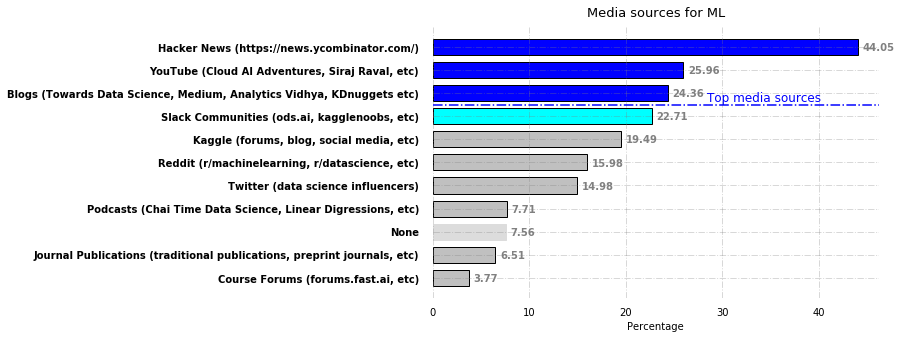

In [23]:
#fig size
fig, ax = plt.subplots(figsize=(8,5))

# Horizontal Bar Plot
b = ax.barh(media_rst.iloc[:,0], media_rst.iloc[:,1], color='silver', edgecolor='black', height=0.7)
b[0].set_color('blue')
b[0].set_edgecolor('black')
b[0].set_linewidth(1)
b[1].set_color('blue')
b[1].set_edgecolor('black')
b[1].set_linewidth(1)
b[2].set_color('blue')
b[2].set_edgecolor('black')
b[2].set_linewidth(1)
b[3].set_color('cyan')
b[3].set_edgecolor('black')
b[3].set_linewidth(1)
b[8].set_color('gainsboro')

# Remove axes spines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
    
# Remove x,y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between the axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.3)

# Show top values
ax.invert_yaxis()

# Add plot title
ax.set_title("Media sources for ML", loc='center', pad=10, fontsize=13)
ax.set_xlabel('Percentage')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+0.5, i.get_y()+0.5, str(round(i.get_width(),2)), 
           fontsize=10, fontweight='bold', color='grey')
z = [x for x in range(0,11)]
plt.yticks(z, list(media_rst.iloc[:,0]), weight='bold')

fig.text(0.7, 0.7, 'Top media sources', fontsize=12, color='blue', ha='center', va='top')
plt.axhline(y=2.5, color='blue', linestyle='-.')

plt.show()

-	The top three media sources for Machine Learning - __Hacker News__, __YouTube__ and __Blogs__.
-	These are followed by the communities in __Slack__, a messaging platform for developers.

This buttresses the fact that most of the Data Science Learning is through the __online__ platform. Hopefully, in the future, we will see many universities offering Data Science in their Bachelor's and Master's programmes.

__What is the preferred language for Data Science?__

In [24]:
prog_lang = pd.DataFrame(columns=['language', 'count'])

for i in range(1,13):
    prog_lang = prog_lang.append({'language':dat['Q18_Part_{}'.format(i)].mode()[0], 'count':dat['Q18_Part_{}'.format(i)].count()}, ignore_index=True)

prog_lang.index = prog_lang['language']
prog_lang = prog_lang.drop(columns=['language'])
lang_sort = prog_lang.sort_values(by='count', ascending=False)
lang_rst = lang_sort.reset_index()

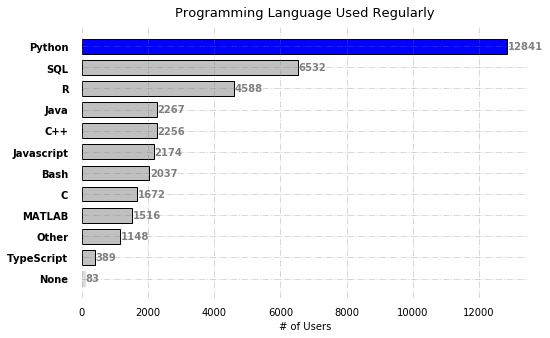

In [25]:
# fig size
fig, ax = plt.subplots(figsize=(8,5))


# Horizontal Bar Plot
dat_ide_rst = dat_ide_sort.reset_index()
b = ax.barh(lang_rst.iloc[:,0], lang_rst.iloc[:,1], color='silver', edgecolor='black', height=0.7)
b[0].set_color('blue')
b[0].set_edgecolor('black')
b[0].set_linewidth(1)
b[11].set_color('gainsboro')

# Remove axes spines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
    
# Remove x,y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between the axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.3)

# Show top values
ax.invert_yaxis()

# Add plot title
ax.set_title("Programming Language Used Regularly", loc='center', pad=10, fontsize=13)
ax.set_xlabel('# of Users')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+20, i.get_y()+0.5, str(round(i.get_width(),2)), 
           fontsize=10, fontweight='bold', color='grey')
z = [x for x in range(0,12)]
plt.yticks(z, list(lang_rst.iloc[:,0]), weight='bold')
plt.show()

In [26]:
lang = dat['Q19'].value_counts().reset_index()

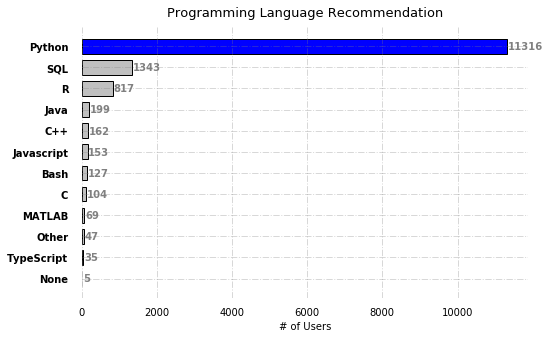

In [27]:
# fig size
fig, ax = plt.subplots(figsize=(8,5))


# Horizontal Bar Plot
b = ax.barh(lang.iloc[:,0], lang.iloc[:,1], color='silver', edgecolor='black', height=0.7)
b[0].set_color('blue')
b[0].set_edgecolor('black')
b[0].set_linewidth(1)
b[11].set_color('gainsboro')

# Remove axes spines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
    
# Remove x,y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between the axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.3)

# Show top values
ax.invert_yaxis()

# Add plot title
ax.set_title("Programming Language Recommendation", loc='center', pad=10, fontsize=13)
ax.set_xlabel('# of Users')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+20, i.get_y()+0.5, str(round(i.get_width(),2)), 
           fontsize=10, fontweight='bold', color='grey')
z = [x for x in range(0,12)]
plt.yticks(z, list(lang_rst.iloc[:,0]), weight='bold')
plt.show()

- __Python__ clearly dominates. It is also the language __mostly recommended__ to newbies in Data Science.

__Python__ has rich libraries in Machine Learning and Deep Learning and it is a simple, readable and easy to learn language. And there is a large Python community built over the years. So, it is a no-brainer that it is the preferred language for Data Science.

In [28]:
visual = pd.DataFrame(columns=['tool', 'count'])

for i in range(1,13):
    visual = visual.append({'tool':dat['Q20_Part_{}'.format(i)].mode()[0], 'count':dat['Q20_Part_{}'.format(i)].count()}, ignore_index=True)

visual.index = visual['tool']
visual = visual.drop(columns=['tool'])
visual_sort = visual.sort_values(by='count', ascending=False)
visual_rst = visual_sort.reset_index()

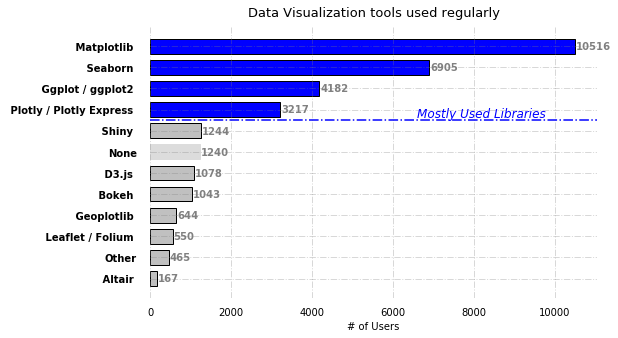

In [29]:
# fig size
fig, ax = plt.subplots(figsize=(8,5))

# Horizontal Bar Plot
b = ax.barh(visual_rst.iloc[:,0], visual_rst.iloc[:,1], color='silver', edgecolor='black', height=0.7)
b[0].set_color('blue')
b[0].set_edgecolor('black')
b[0].set_linewidth(1)
b[1].set_color('blue')
b[1].set_edgecolor('black')
b[1].set_linewidth(1)
b[2].set_color('blue')
b[2].set_edgecolor('black')
b[2].set_linewidth(1)
b[3].set_color('blue')
b[3].set_edgecolor('black')
b[3].set_linewidth(1)
b[5].set_color('gainsboro')

# Remove axes spines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
    
# Remove x,y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between the axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.3)

# Show top values
ax.invert_yaxis()

# Add plot title
ax.set_title("Data Visualization tools used regularly", loc='center', pad=10, fontsize=13)
ax.set_xlabel('# of Users')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+20, i.get_y()+0.5, str(round(i.get_width(),2)), 
           fontsize=10, fontweight='bold', color='grey')
z = [x for x in range(0,12)]
plt.yticks(z, list(visual_rst.iloc[:,0]), weight='bold')

fig.text(0.70, 0.655, 'Mostly Used Libraries', fontsize=12, color='blue', ha='center', va='top', fontstyle='italic')
plt.axhline(y=3.5, color='blue', linestyle='-.')

plt.show()

-	The three of the top four visualization tools are for Python Users – __Matplotlib__, __Seaborn__ and __Plotly__
-	__Ggplot__ is for R users

Since most of the students use Python, it follows that the visualization tools, mostly used are Python visualization libraries.

In [30]:
code_exp = dat['Q15'].value_counts().reset_index()

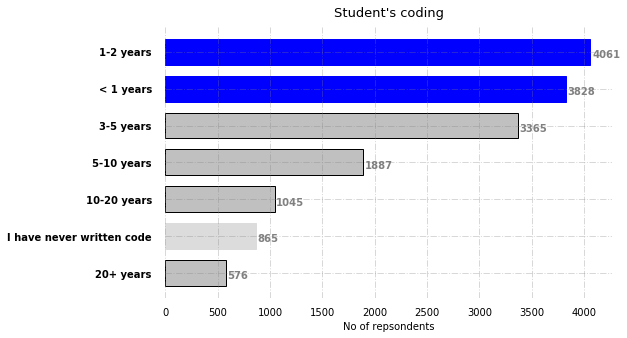

In [31]:
#fig size
fig, ax = plt.subplots(figsize=(8,5))

b = ax.barh(code_exp.iloc[:,0], code_exp.iloc[:,1], color='silver', edgecolor='black', height=0.7)
b[0].set_color('blue')
b[0].set_linewidth(1)
b[1].set_color('blue')
b[1].set_linewidth(1)
b[5].set_color('gainsboro')
# b[5].set_edgecolor('black')

# Remove axes spines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
    
# Remove x,y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between the axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.3)

# Show top values
ax.invert_yaxis()

# Add plot title
ax.set_title("Student's coding", loc='center', pad=10, fontsize=13)
ax.set_xlabel('No of repsondents')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+15, i.get_y()+0.5, str(round(i.get_width(),2)), 
           fontsize=10, fontweight='bold', color='grey')
    
z = [x for x in range(0,7)]
plt.yticks(z, list(code_exp.iloc[:,0]), weight='bold')
plt.show()

-	The majority of the students have at most __2 years__ of experience with coding.

Hopefully, by the end of their studies, they must have acquired sufficient coding skills which is much needed and which will make them more competitive in the industry, assuming that they are in the first or second year of their program as at the time this survey is made.

In [32]:
ml_algo = pd.DataFrame(columns=['algo', 'count'])

for i in range(1,13):
    ml_algo = ml_algo.append({'algo':dat['Q24_Part_{}'.format(i)].mode()[0], 'count':dat['Q24_Part_{}'.format(i)].count()}, ignore_index=True)

# ml_algo
ml_algo.index = ml_algo['algo']
ml_algo = ml_algo.drop(columns='algo')
ml_algo_sort = ml_algo.sort_values(by='count', ascending=False)
ml_algo_rst = ml_algo_sort.reset_index()

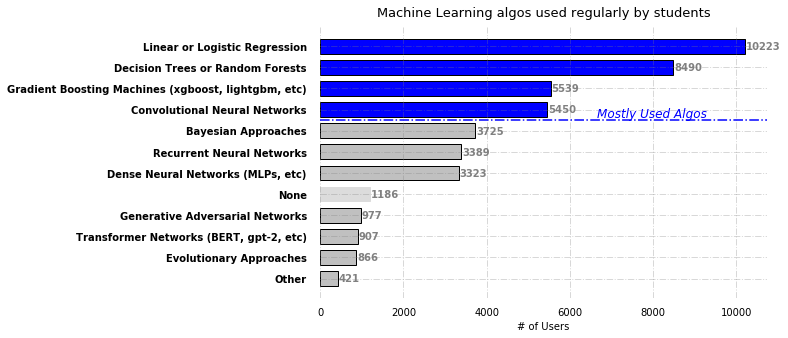

In [33]:
# fig size
fig, ax = plt.subplots(figsize=(8,5))

# Horizontal Bar Plot
b = ax.barh(ml_algo_rst.iloc[:,0], ml_algo_rst.iloc[:,1], color='silver', edgecolor='black', height=0.7)
b[0].set_color('blue')
b[0].set_edgecolor('black')
b[0].set_linewidth(1)
b[1].set_color('blue')
b[1].set_edgecolor('black')
b[1].set_linewidth(1)
b[2].set_color('blue')
b[2].set_edgecolor('black')
b[2].set_linewidth(1)
b[3].set_color('blue')
b[3].set_edgecolor('black')
b[3].set_linewidth(1)
b[7].set_color('gainsboro')

# Remove axes spines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
    
# Remove x,y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between the axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.3)

# Show top values
ax.invert_yaxis()

# Add plot title
ax.set_title("Machine Learning algos used regularly by students", loc='center', pad=10, fontsize=13)
ax.set_xlabel('# of Users')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+20, i.get_y()+0.5, str(round(i.get_width(),2)), 
           fontsize=10, fontweight='bold', color='grey')
z = [x for x in range(0,12)]
plt.yticks(z, list(ml_algo_rst.iloc[:,0]), weight='bold')

fig.text(0.70, 0.655, 'Mostly Used Algos', fontsize=12, color='blue', ha='center', va='top', fontstyle='italic')
plt.axhline(y=3.5, color='blue', linestyle='-.')

plt.show()

The most common algorithms used by students are:
-	Linear/Logistic Regression
-	Decision Trees o Random Forests
-	Gradient Boosting Machines
-	Convolutional Neural Networks

This makes sense because most the beginner datasets in Kaggle – __Titanic__ datasets, __MNIST__ datasets, __House Prices__ datasets etc – can be worked on using any of these four algorithms.

So, to break into the Data Science field either as a student or an independent learner, learn the technology either in your school if it is incorporated in your curriculum for your degree program or learn online through the Massive Open Online Courses, MOOCs for free and then sharpen your skills through competitons like Kaggle or intern as a Data Scientist/ Data Analyst in a company to work with real data. 

We are now going to consider how Machine Learning is affecting the industries, businesses and companies.

## WHAT IS HAPPENING WITH MACHINE LEARNING IN DIFFERENT INDUSTRIES?

In [34]:
job = dat['Q5'].value_counts().reset_index()

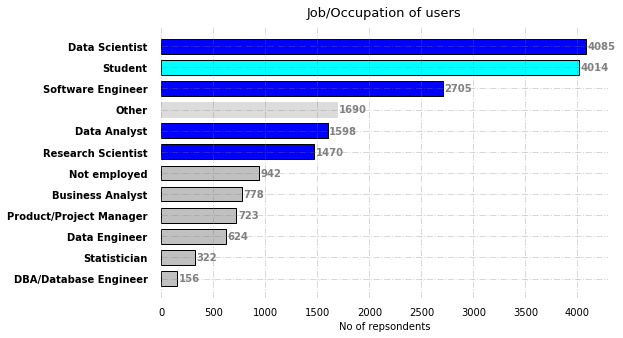

In [36]:
#fig size
fig, ax = plt.subplots(figsize=(8,5))

b = ax.barh(job.iloc[:,0], job.iloc[:,1], color='silver', edgecolor='black', height=0.7)
b[0].set_color('blue')
b[0].set_edgecolor('black')
b[0].set_linewidth(1)
b[1].set_color('cyan')
b[1].set_edgecolor('black')
b[1].set_linewidth(1)
b[2].set_color('blue')
b[2].set_edgecolor('black')
b[2].set_linewidth(1)
b[3].set_color('gainsboro')
b[4].set_color('blue')
b[4].set_edgecolor('black')
b[4].set_linewidth(1)
b[5].set_color('blue')
b[5].set_edgecolor('black')
b[5].set_linewidth(1)

# Remove axes spines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
    
# Remove x,y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between the axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.3)

# Show top values
ax.invert_yaxis()

# Add plot title
ax.set_title("Job/Occupation of users", loc='center', pad=10, fontsize=13)
ax.set_xlabel('No of repsondents')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+15, i.get_y()+0.5, str(round(i.get_width(),2)), 
           fontsize=10, fontweight='bold', color='grey')
    
z = [x for x in range(0,12)]
plt.yticks(z, list(job.iloc[:,0]), weight='bold')
plt.show()

-	Most of the job positions of the respondents are: __Data Scientists__, __Software Engineers__, __Data Analysts__ and __Research Scientists__.
-	We also find a large number of __students__ among the respondents. Which strengthens the hypothesis that employability highly correlates with university learning.

In [37]:
ml_incorp = dat['Q8'].value_counts().reset_index()

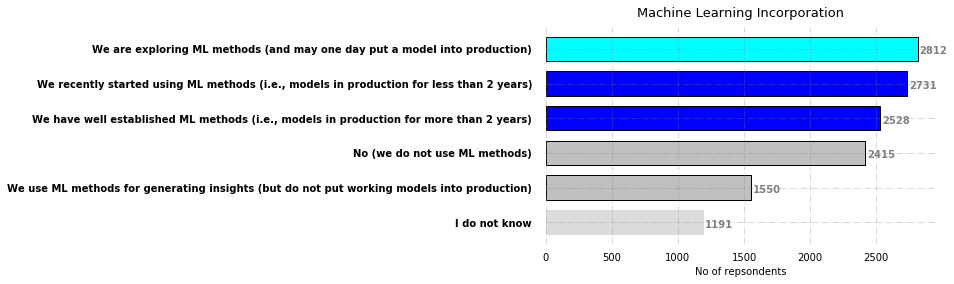

In [39]:
#fig size
fig, ax = plt.subplots(figsize=(7,4))

b = ax.barh(ml_incorp.iloc[:,0], ml_incorp.iloc[:,1], color='silver', edgecolor='black', height=0.7)
b[0].set_color('cyan')
b[0].set_edgecolor('black')
b[0].set_linewidth(1)
b[1].set_color('blue')
b[1].set_edgecolor('black')
b[1].set_linewidth(1)
b[2].set_color('blue')
b[2].set_edgecolor('black')
b[2].set_linewidth(1)
b[5].set_color('gainsboro')

# Remove axes spines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
    
# Remove x,y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between the axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.3)

# Show top values
ax.invert_yaxis()

# Add plot title
ax.set_title("Machine Learning Incorporation", loc='center', pad=10, fontsize=13)
ax.set_xlabel('No of repsondents')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+15, i.get_y()+0.5, str(round(i.get_width(),2)), 
           fontsize=10, fontweight='bold', color='grey')
    
z = [x for x in range(0,6)]
plt.yticks(z, list(ml_incorp.iloc[:,0]), weight='bold')
plt.show()

-	A large number of companies are __exploring__ Machine Learning methods.
-	Others are either starting __to use__ or have __well established__ ML methods.

This comes down to the fact that eventually most companies will adopt Machine Learning methods. Which is good for the students actively pursuing careers in Data Science, Machine Learning and Artificial Intelligence. This reminds me of the saying that _['AI is the new electricity'](https://www.gsb.stanford.edu/insights/andrew-ng-why-ai-new-electricity)[1]_. It will cut across almost every industry. So, it is a good and lucrative skill to acquire.

In [40]:
size_coy = dat['Q6'].value_counts().reset_index()

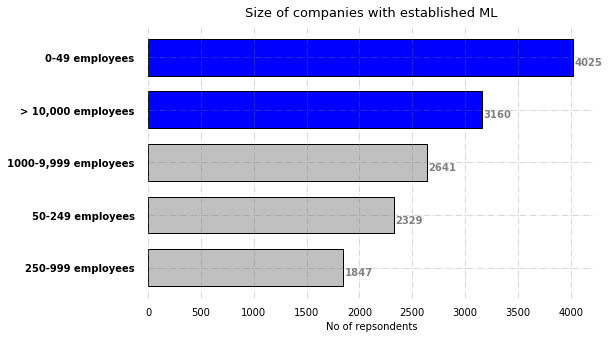

In [41]:
#fig size
fig, ax = plt.subplots(figsize=(8,5))

b = ax.barh(size_coy.iloc[:,0], size_coy.iloc[:,1], color='silver', edgecolor='black', height=0.7)
b[0].set_color('blue')
b[0].set_edgecolor('black')
b[0].set_linewidth(1)
b[1].set_color('blue')
b[1].set_edgecolor('black')
b[1].set_linewidth(1)


# Remove axes spines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
    
# Remove x,y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between the axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.3)

# Show top values
ax.invert_yaxis()

# Add plot title
ax.set_title("Size of companies with established ML", loc='center', pad=10, fontsize=13)
ax.set_xlabel('No of repsondents')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+15, i.get_y()+0.5, str(round(i.get_width(),2)), 
           fontsize=10, fontweight='bold', color='grey')
    
z = [x for x in range(0,5)]
plt.yticks(z, list(size_coy.iloc[:,0]), weight='bold')
plt.show()

Here is an interesting insight to observe.
-	Most of companies with established ML methods are of the size, either of __(> 10,000 employees)__ or of __(0-49 employees)__. 

That is very big companies __(like Amazon, Facebook, Google)__ or very small companies __(like venture-capital-backed start-up companies)__. This gives the data scientist multiple opportunities across the wide spectrum of companies, to intern with or to work for.

Now, coming to the cost spent on cloud computing.

In [42]:
ml_cost = dat['Q11'].value_counts().reset_index()

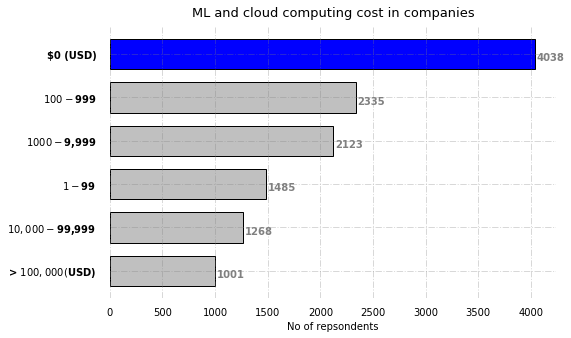

In [43]:
#fig size
fig, ax = plt.subplots(figsize=(8,5))

b = ax.barh(ml_cost.iloc[:,0], ml_cost.iloc[:,1], color='silver', edgecolor='black', height=0.7)
b[0].set_color('blue')
b[0].set_edgecolor('black')
b[0].set_linewidth(1)

# Remove axes spines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
    
# Remove x,y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between the axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.3)

# Show top values
ax.invert_yaxis()

# Add plot title
ax.set_title("ML and cloud computing cost in companies", loc='center', pad=10, fontsize=13)
ax.set_xlabel('No of repsondents')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+15, i.get_y()+0.5, str(round(i.get_width(),2)), 
           fontsize=10, fontweight='bold', color='grey')
    
z = [x for x in range(0,6)]
plt.yticks(z, list(ml_cost.iloc[:,0]), weight='bold')
plt.show()

-	Many companies spend __$0__ on Machine Learning and cloud computing products.

Why is this so, since it seems that only the big companies can afford the products? The answer is that we are almost in the _era of the democratization of computing_ where small companies like startups and medium size companies can have access to data centers with high computing capacity at a very low cost. Or even free of charge. This explains why many spend nothing and yet benefit much from cloud computing products.

In [44]:
cloud_plt = pd.DataFrame(columns=['platform', 'count'])

for i in range(1,13):
    cloud_plt = cloud_plt.append({'platform':dat['Q29_Part_{}'.format(i)].mode()[0], 'count':dat['Q29_Part_{}'.format(i)].count()}, ignore_index=True)

cloud_plt.index = cloud_plt['platform']
cloud_plt = cloud_plt.drop(columns='platform')
cloud_plt_sort = cloud_plt.sort_values(by='count', ascending=False)
cloud_plt_rst = cloud_plt_sort.reset_index()

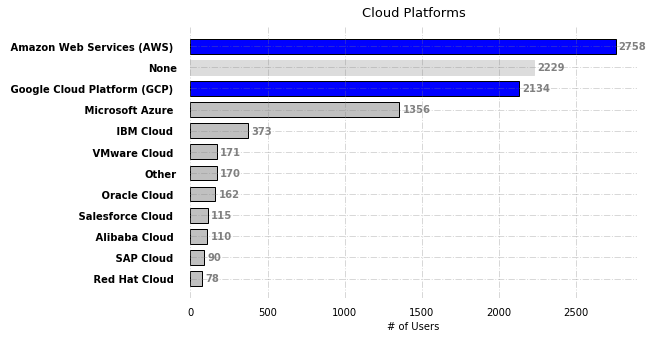

In [45]:
# fig size
fig, ax = plt.subplots(figsize=(8,5))

# Horizontal Bar Plot
b = ax.barh(cloud_plt_rst.iloc[:,0], cloud_plt_rst.iloc[:,1], color='silver', edgecolor='black', height=0.7)
b[0].set_color('blue')
b[0].set_edgecolor('black')
b[0].set_linewidth(1)
b[1].set_color('gainsboro')
b[2].set_color('blue')
b[2].set_edgecolor('black')
b[2].set_linewidth(1)

# Remove axes spines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
    
# Remove x,y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between the axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.3)

# Show top values
ax.invert_yaxis()

# Add plot title
ax.set_title("Cloud Platforms", loc='center', pad=10, fontsize=13)
ax.set_xlabel('# of Users')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+20, i.get_y()+0.5, str(round(i.get_width(),2)), 
           fontsize=10, fontweight='bold', color='grey')
z = [x for x in range(0,12)]
plt.yticks(z, list(cloud_plt_rst.iloc[:,0]), weight='bold')

plt.show()

-	The cloud services used by most Kagglers are: __Amazon Web Services__ and __Google Cloud Platform__.

For a reasonable amount of money, you can have access to high cloud computing services from companies like __Amazon__ and __Google__.

## Conclusion

We can see that there is a __high interest in Data Science and Machine Learning skills__. Most young graduates are learning them online and Universities are incorporating them into their programs. So, we will be seeing graduates knowledgeable in their domain expertise and also skilled in Data Science. This becomes a huge asset for companies to meet their business needs, improve their sales, and broaden their scope in research and development. They also are __incorporating ML methods__ in their companies.

So, if you are a student in the University, especially in the STEM fields, it is a huge investment to pick up Data Science skills on the side and incorporate it into your field of learning.

Or if you run a company, improve your overall efficiency by incorporating Machine/Deep Learning models to make your business decisions data driven. If you can’t afford the expensive cloud computing products, some of them are free of charge. Leverage on that.

[Software and Artificial Intelligence are eating the world](https://www.forbes.com/sites/cognitiveworld/2019/08/29/software-ate-the-world-now-ai-is-eating-software/#4788940a5810) [2]. They are the new electricity. The best thing is to speed up your adoption of Artificial Intelligence, either as a student or as a business owner.

## References

[1]. Andrew Ng: Why AI Is the New Electricity https://www.gsb.stanford.edu/insights/andrew-ng-why-ai-new-electricity
[2]. Software Ate The World, Now AI Is Eating Software https://www.forbes.com/sites/cognitiveworld/2019/08/29/software-ate-the-world-now-ai-is-eating-software/#4788940a5810